Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.03 Convolution and Filtering -Time Domain</font>

# <font color=red>TUTORIAL</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b",linewidth = 1): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.03.T1) Gain Functions</font>

### <font color=red>DSP.03.T1.a) What frequencies are removed?</font>

Here is a timeseries.

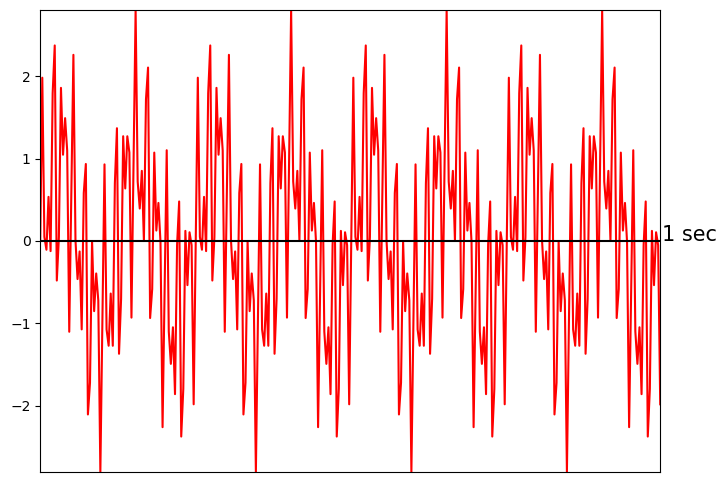

In [2]:
time = np.arange(0,1,1/300)
freq1 = 8
freq2 = 60
freq3 = 100
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)+ np.sin(2*np.pi * freq3 * time)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Create a five-point moving-average kernel and compute a filtered timeseries by convolving the filter
with the unfiltered timeseries.

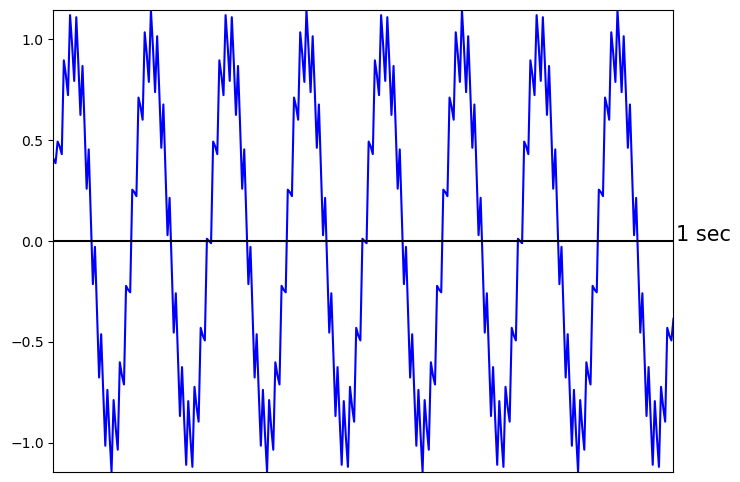

In [3]:
from scipy import signal

kernel = 1/5 * np.ones(5) #this looks like { 1/5 , 1/5 , 1/5 , 1/5 , 1/5}
newydata = signal.convolve(timeseries,kernel,mode='same')


make_plot_1(time,newydata)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Remember that, because we cannot apply the kernel at the beginning and end of the timeseries, we are shifting the filtered timeseries so that
the points in the filtered timeseries match the points in the unfiltered timeseries.

Look at the difference between the original unfiltered timeseries and the filtered timeseries in the time
domain.

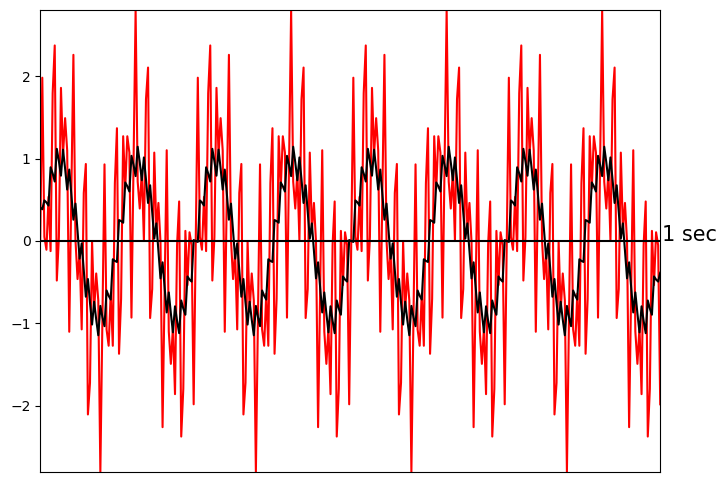

In [4]:
make_plot_2(time,timeseries,'r', time, newydata,'k')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

They look different.

Compare the unfiltered and filtered timeseries in the frequency domain.

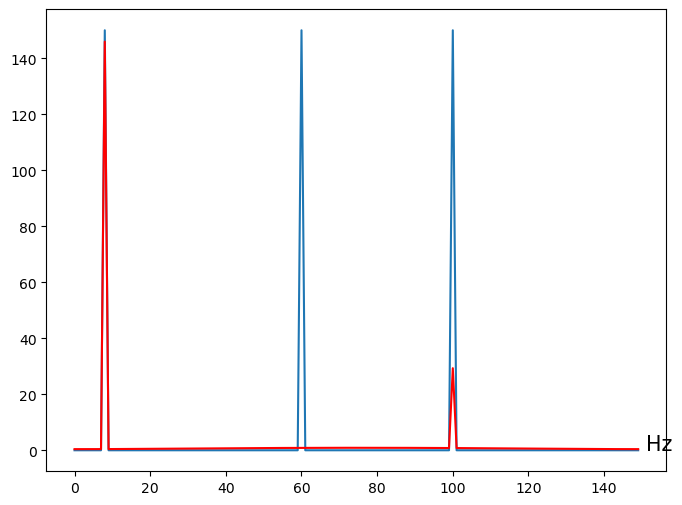

In [5]:
make_plot_freq_2(timeseries,newydata,300)

# Adding text to the figure
plt.text(151,0,'Hz',fontsize=15)
plt.show()

Some 100 Hz activity is still present. 60 Hz activity is completely removed. You can notice that this filter
is neither a high-pass nor, very successfully, a low-pass filter. At least for these 3 original signals, this is a very precise filter, completely removing just the 60 Hz signal.

100 Hz activity completes 100 full cycles in 300 points. As 300/100 = 3, a kernel of size three (or a multiple of
three) is needed to cover an integer number of 100 Hz cycles. Because the kernel of size five does not
cover an integer number of 100 Hz cycles, not all 100 Hz activity is removed.

60 Hz activity completes 60 full cycles in 300 points, and one full cycle in 300/60 = 5 points. A kernel of size
five covers one complete 60 Hz cycle. Thus, all 60 Hz activity is removed.

Aside from 60 Hz activity, when digitizing at 300 Hz what other frequencies does a moving average
kernel of size five completely remove?

Answer:

When digitizing at 300 Hz, a kernel of size five removes frequencies that complete an integer number of
cycles over five points.

Calculate 300/120 = 2.5 to find that 120 Hz activity completes two full cycles over five points. If 120 Hz
activity exists in the timeseries, it is completely removed.

Calculate 300/60 = 5 to find that 60 Hz activity completes one full cycle over five points. Thus, 60 Hz activity
is completely removed.

Because no frequency below 60 Hz completes a full cycle in five points, activity at lower frequencies is
only partially removed.

Thus, when digitizing at 300 Hz, a kernel of size five completely removes 60 and 120 Hz activity.

### <font color=red>DSP.03.T1.b) What frequencies are removed?</font>

Here is the same timeseries, this time digitized at 500 Hz.

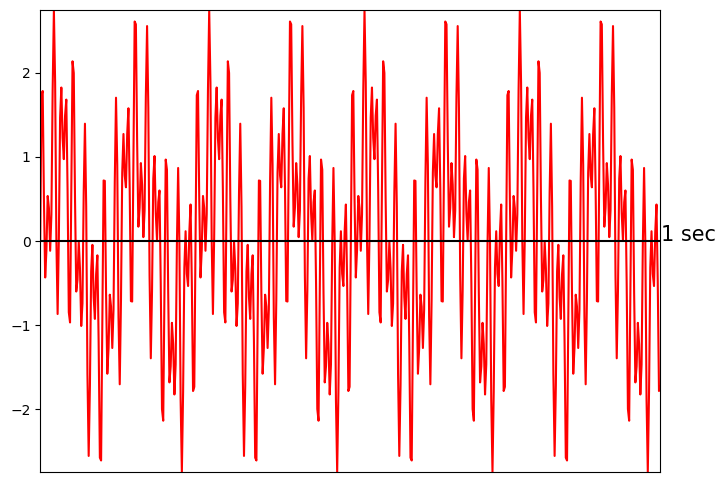

In [6]:
time = np.arange(0,1,1/500)
freq1 = 8
freq2 = 60
freq3 = 100
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)+ np.sin(2*np.pi * freq3 * time)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Create a five-point moving-average kernel and compute a filtered timeseries by convolving the filter
with the unfiltered timeseries.

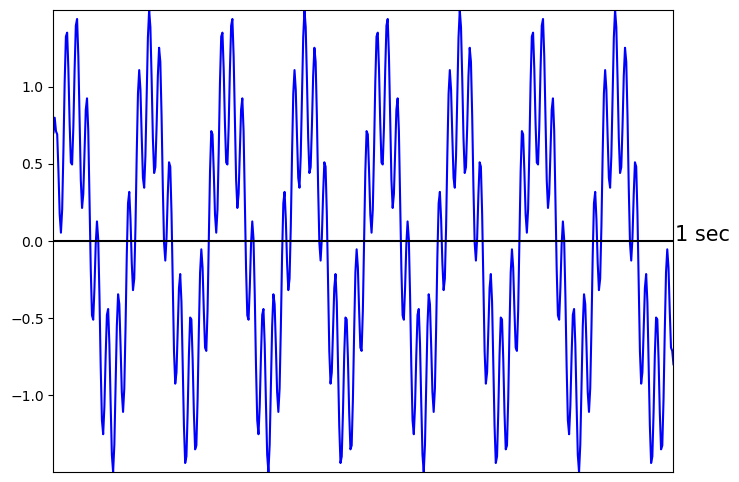

In [7]:
from scipy import signal

kernel = 1/5 * np.ones(5)
newydata = signal.convolve(timeseries,kernel,mode='same')

make_plot_1(time,newydata)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Look at the difference between the original unfiltered timeseries and the filtered timeseries in the time
domain.

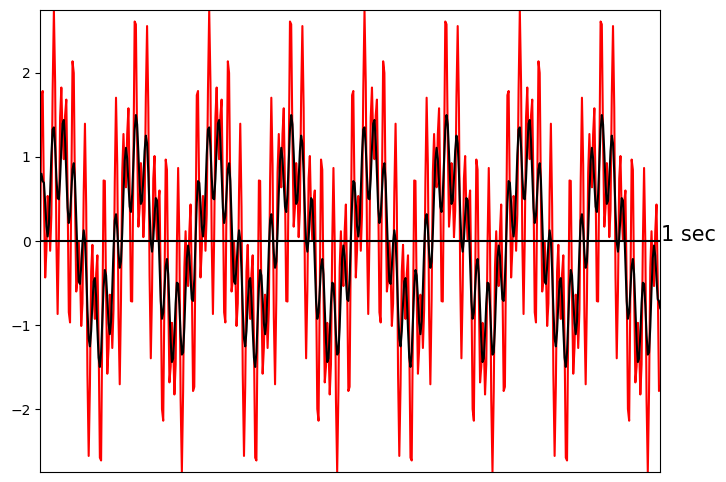

In [8]:
make_plot_2(time,timeseries,'r', time, newydata,'k')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

They look different.

Compare the unfiltered and filtered timeseries in the frequency domain.

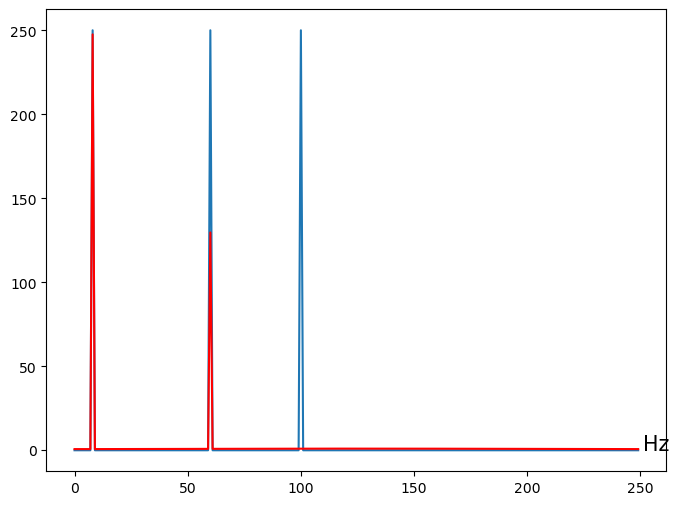

In [9]:
make_plot_freq_2(timeseries,newydata,500)

# Adding text to the figure
plt.text(251,0,'Hz',fontsize=15)
plt.show()

Some 60 Hz activity is still present. 100 Hz activity is completely removed.

100 Hz activity completes 100 full cycles in 500 points, and one full cycle in 500/100 = 5 points. As a kernel of
size 5 covers one complete 100 Hz cycle, all 100 Hz activity is removed.

60 Hz activity completes 60 full cycles in 500 points, and one full cycle in 500/60 = 8.33 points. A kernel of
size 5 does not cover an integer number of 60 Hz cycles. Thus, 60 Hz activity is not completely removed.

Aside from 100 Hz activity, what other frequencies does a moving average kernel of size 5 completely remove?

Answer:
    
When digitizing at 500 Hz, a kernel of size five removes frequencies that complete an integer number of
cycles over five points.

Calculate 500/200 = 2.5 to find that 200 Hz activity completes two full cycles over five points and thus 200 Hz
activity is completely removed.

Calculate 500/100 = 5 to find that 100 Hz activity completes one full cycle over five points and thus 100 Hz
activity is completely removed.

Because no frequency below 100 Hz completes a full cycle in five points, activity at lower frequencies is
not completely removed.

Thus, when digitizing at 500 Hz, a kernel of size five completely removes 100 and 200 Hz activity.
In the examples above, we determined the frequencies where all activity is completely removed when
digitizing at a particular sampling rate and applying a moving average kernel of a particular size. After
filtering, at some frequencies activity was completely removed. At other frequencies residual activity
remained.

Take another look at the spectrum plot.

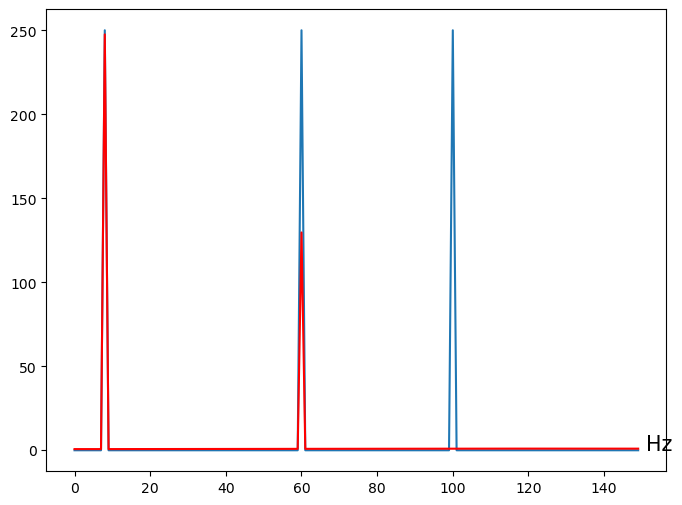

In [10]:
make_plot_freq_2(timeseries,newydata,300)

# Adding text to the figure
plt.text(151,0,'Hz',fontsize=15)
plt.show()

Although the spectrum plots show that activity at 60 Hz is reduced but not eliminated, the amount of
activity removed at 60 Hz is unclear.

In the following section we will see how complex exponentials can provide more detailed information
about a given filter, allowing us to find the percentage of activity removed at each frequency.

### <font color=red>DSP.03.T1.c) Gain Values</font>

In Chapter 1 we noted that sometimes complex exponentials provide insight into specific signal processing
techniques.

Here is one of those instances.

Recall Euler's identities:

$e^{i x} = cos[x] + $i$sin[x]$  and
 
$e^{-i x} = cos[x] - $i$ sin[x]$
  
We are going to use complex exponentials to determine the amount of activity removed at specific
frequencies when using a moving-average filter.

Consider the following example -

When using a 5-point moving-average filter the kernel is expressed as { 1/5 , 1/5 , 1/5 , 1/5 , 1/5 } or 1/5 {1, 1, 1, 1, 1}
and the kernel was convolved with a set of 5 unfiltered datapoints. Point to these datapoints in time
as t = -2, -1, 0, 1, 2.

Now, using ω as the symbol for frequency, replace the 1's in the kernel with the complex exponential term $e^{iωt}$ to get
1/5 {$e^{iωt}$, $e^{iωt}$, $e^{iωt}$, $e^{iωt}$, $e^{iωt}$} . Next, add in the time values t = -2, -1, 0, 1, 2 to get
1/5 {$e^{-iω2}$, $e^{-iω1}$, $e^{iω0}$, $e^{iω1}$, $e^{iω2}$} .

Define this as:

H(ω) =  1/5 {$e^{-iω2}$, $e^{-iω1}$, $e^{iω0}$, $e^{iω1}$, $e^{iω2}$} .

Apply Euler's identities (shown above) and note that the negative and positive complex exponential
terms have the same coefficient to obtain:

H(ω) = 1/5 (1 + 2 Cos[ω] + 2 Cos[2 ω]) .

H(ω) is called the transfer function - each input frequency’s amplitude is transferred to the output
frequency’s amplitude by multiplying by H(ω).

If you are in the know, then you will know that the term we derived above  1/5 {$e^{-iω2}$, $e^{-iω1}$, $e^{iω0}$, $e^{iω1}$, $e^{iω2}$} is called the eigenfunction, and that for
a given frequency, H(ω) computes what is called the eigenvalue for the frequency ω.

### <font color=red>DSP.03.T1.d) Transfer Functions</font>

Let's see how transfer functions work.

Here is a timeseries examined above.

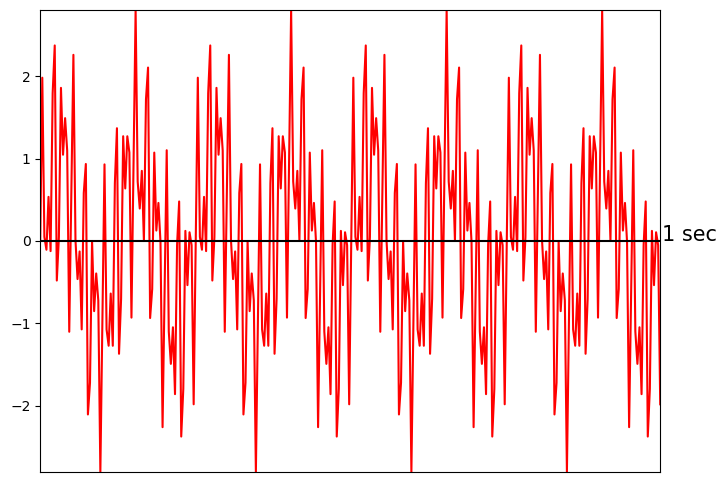

In [11]:
time = np.arange(0,1,1/300)
freq1 = 8
freq2 = 60
freq3 = 100
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)+ np.sin(2*np.pi * freq3 * time)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

When digitizing at 300 Hz, a kernel of size 5 completely removes 60 and 120 Hz activity (see above if
you need a reminder of why this is the case).

Create the filtered timeseries.

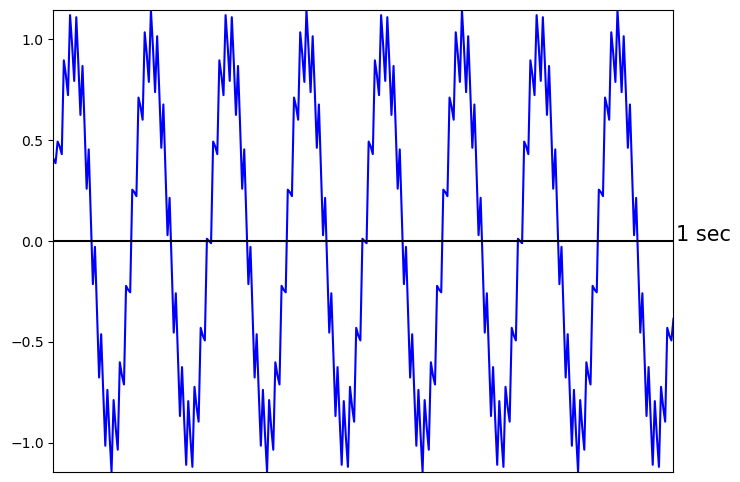

In [12]:
from scipy import signal

kernel = 1/5 * np.ones(5)
newydata = signal.convolve(timeseries,kernel,mode='same')

make_plot_1(time,newydata)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Compare the power spectrum of the first and second plot.

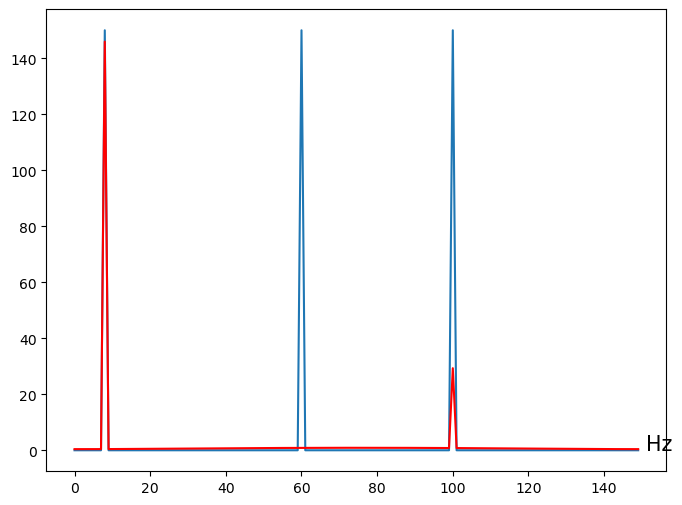

In [13]:
make_plot_freq_2(timeseries,newydata,300)

# Adding text to the figure
plt.text(151,0,'Hz',fontsize=15)
plt.show()

60 Hz activity is completely removed. There is some residual 100 Hz activity.

Create the same filtered timeseries using the transfer function H(ω) instead of the moving average
kernel.

As computed above, for a 5-point moving-average filter, H(ω) = 1/5 (1 + 2 Cos[ω] + 2 Cos[2 ω]).

For each input frequency, calculate H(ω) in terms of angular frequency. (What is angular frequency? You may recall from Lesson 1 that a sine wave unfolding over time is essentially the same as counterclockwise rotation on an X-Y plane, with 0 degrees (= radians) being when the position is on the positive x-axis. So, angular frequency is the rate which the angle is changing.)

In [14]:
def f(omega):
    result = 1/5 * (1 + 2 * np.cos(omega) + 2 * np.cos(2 * omega))
    return result

round(f(8 * 2 * np.pi /300),6)  #for the first frequency we included in the timeseries

0.972149

In [15]:
round(f(60 * 2 * np.pi /300),6)  #for the second frequency we included in the timeseries

0.0

In [16]:
round(f(100 * 2 * np.pi /300),6)  #for the third frequency we included in the timeseries

-0.2

If needed, go back to Chapter 1 Basics to review how to convert from degrees to radians. 

The calculations above provide the transfer function value (or eigenvalue) for each frequency. 

Check it out. Create a filtered timeseries by multiplying each frequency by the calculated eigenvalue. In
particular, to obtain the filtered timeseries, multiply 8 Hz activity by 0.972, 60 Hz activity by 0, and 100
Hz activity by -0.2.

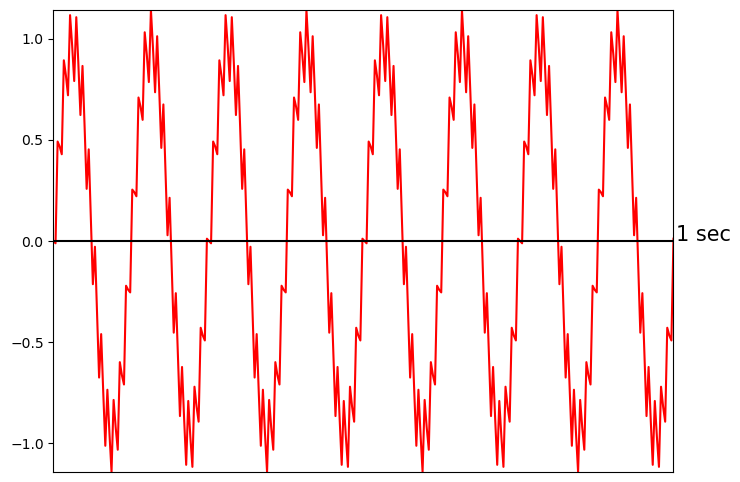

In [17]:
time = np.arange(0,1,1/300)
freq1 = 8
freq2 = 60
freq3 = 100
newydata2 = 0.97 * np.sin(2*np.pi * freq1 * time) + 0 * np.sin(2*np.pi * freq2 * time) - 0.2* np.sin(2*np.pi * freq3 * time)

make_plot_1(time,newydata2,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Compare the filtered timeseries using the moving average method (plot 1) and the transfer function
method (plot 2).

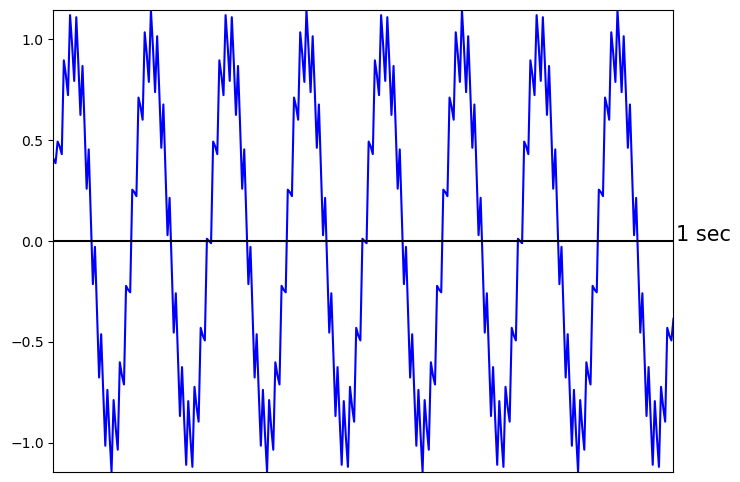

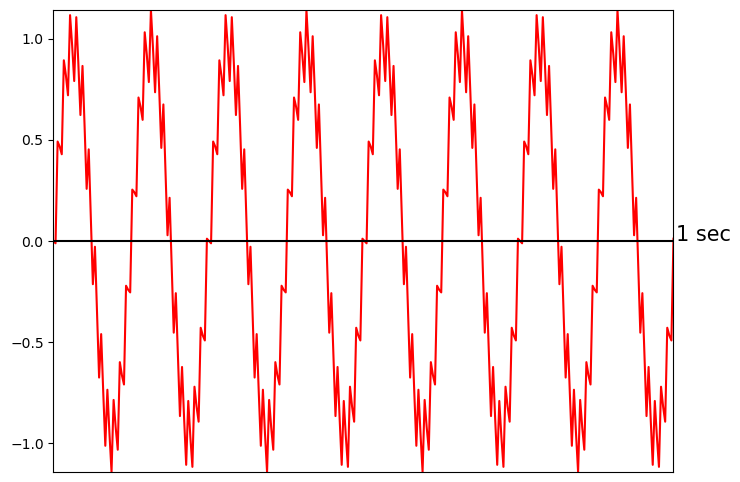

In [18]:
make_plot_1(time,newydata,'b')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

make_plot_1(time,newydata2,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

They look identical. In fact, they have to - the two methods are just different ways of looking at the
same process. Which method do you prefer? In a moment, we'll see an advantage of the transfer function method. 

### <font color=red>DSP.03.T1.e) Gain Functions</font>

Stay with the 5-point moving-average filter calculated above.

H(ω) = 1/5 (1 + 2 Cos[ω] + 2 Cos[2 ω])

Plot this as a function in terms of ω = frequency. How much of a given frequency gets through the filter? 

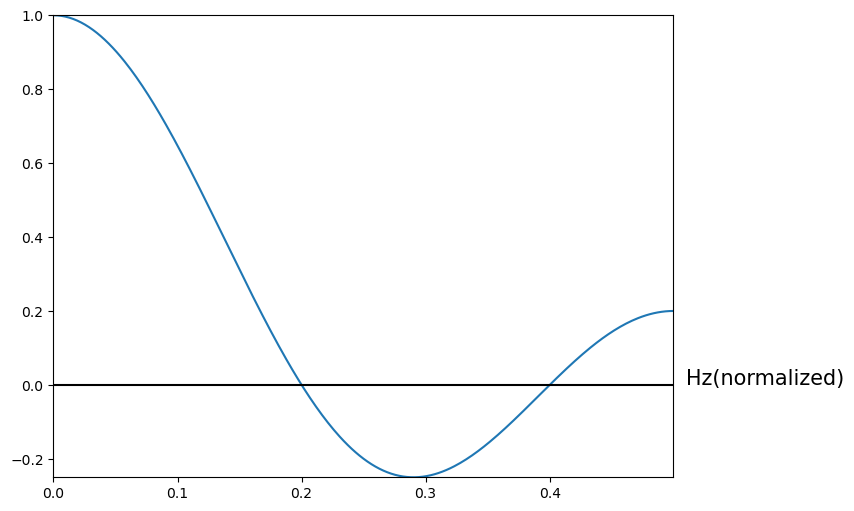

In [19]:
omega = np.arange(0,np.pi,0.01)
freq = omega / (2*np.pi)

freqseries = 1/5 * (1 + 2 * np.cos(omega) + 2 * np.cos(2*omega))

plt.plot(freq, freqseries)
plt.margins(x=0, y=0)
plt.axhline(y=0, color='k')
plt.text(0.51,0,'Hz(normalized)',fontsize=15)

plt.show()

This is commonly referred to as a gain plot. Frequency is shown on the x axis and gain on the y axis.

What is gain?

Gain is the amount of activity removed or added to a signal. Strictly speaking, it is the ratio of output to
input. The plot above provides gain values for frequencies from 0 to the Nyquist Frequency.

For a given frequency, a gain value of 1 tells us that no activity is added or removed at that frequency. A gain value of 0 tells us that all
activity is removed at that frequency.

In the plot above, the two frequencies where the gain is zero are 0.2 and 0.4 Hz.

Here is how to apply the above gain function plot to the two examples above:
    
When digitizing at 300 Hz the gain is zero at 60 Hz (300 × 0.2) and 120 Hz (300 × 0.4).

When digitizing at 500 Hz the gain is zero at 100 Hz (500 × 0.2) and 200 Hz (500 × 0.4).

These were the values computed in the examples above.

### <font color=red>DSP.03.T1.f) More on Gain Functions</font>

What other information can a gain plot provide?

Answer: Take another look.

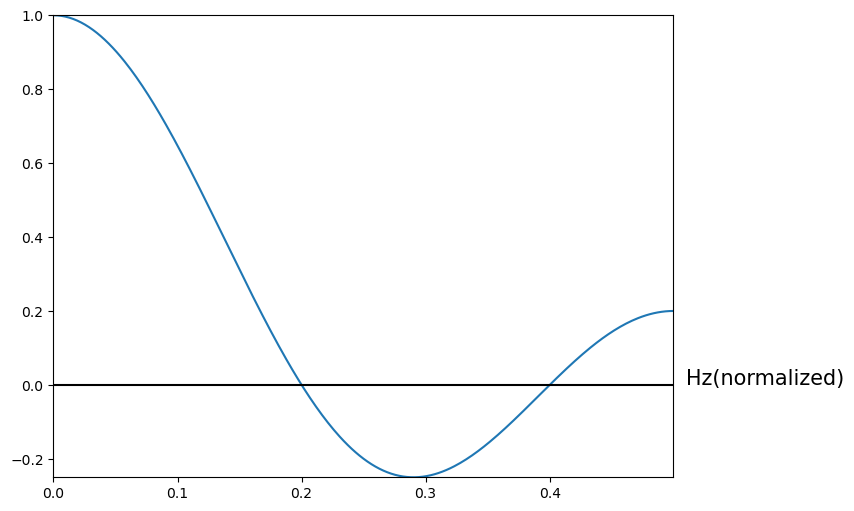

In [20]:
plt.plot(freq, freqseries)
plt.margins(x=0, y=0)
plt.axhline(y=0, color='k')
plt.text(0.51,0,'Hz(normalized)',fontsize=15)

plt.show()

A gain value of 1 at 0 Hz means that the DC offset (the average level) is unchanged.

Gain values decrease but remain positive until 0.2 Hz. Gain values are negative from 0.2 to 0.4 Hz, and
then positive.

The gain function plot tells you a whole lot about how a filter behaves.

### <font color=red>DSP.03.T1.g) Negative gain values</font>

Did you catch all of what was just said?

Take another look at the plot and text.

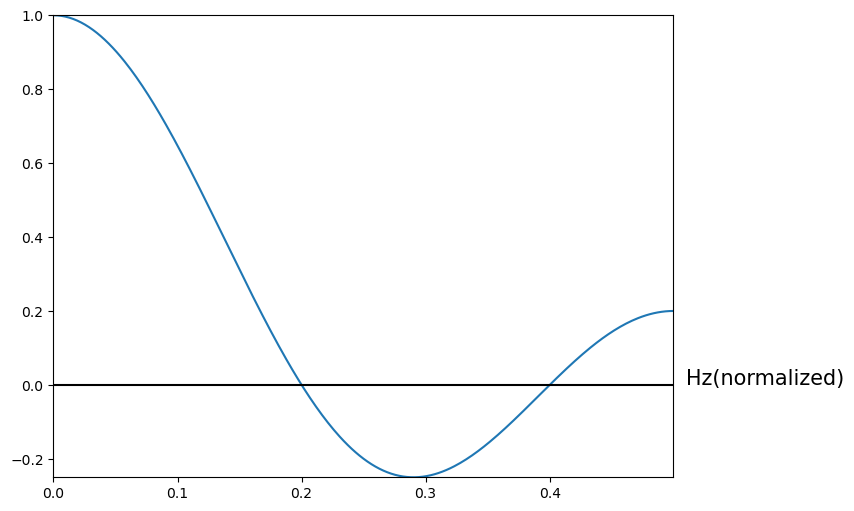

In [21]:
plt.plot(freq, freqseries)
plt.margins(x=0, y=0)
plt.axhline(y=0, color='k')
plt.text(0.51,0,'Hz(normalized)',fontsize=15)

plt.show()

A gain value of 1 at 0 Hz means that the DC offset is unchanged.

Gain values decrease but remain positive until 0.2 Hz. Gain values are negative from 0.2 to 0.4 Hz, and
then positive.

By the way...what does a negative gain value mean?

To get perspective on the effect of a negative gain value, take a look at an unfiltered 10 Hz wave and a
filtered 10 Hz wave using a -0.2 transfer function value.

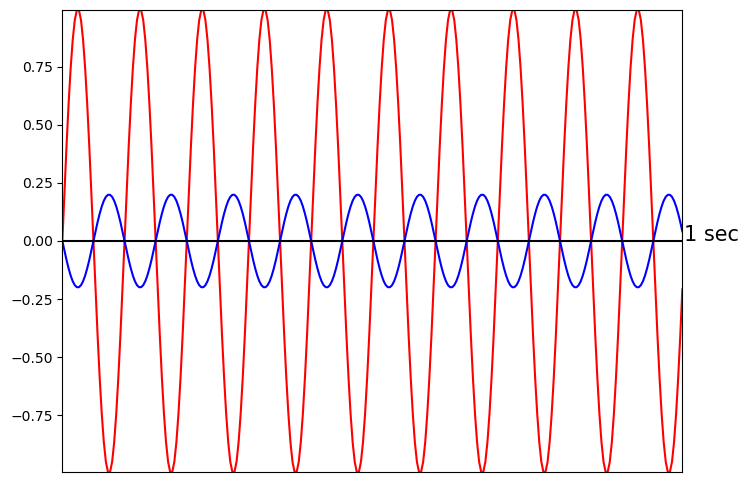

In [22]:
time = np.arange(0,1,1/300)
timeseries1 = np.sin(2*np.pi * 10 * time) 
timeseries2 = -0.2 * np.sin(2*np.pi * 10 * time)

make_plot_2(time,timeseries1,'r', time, timeseries2,'b')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

What differences do you notice between the unfiltered and filtered 10 Hz signal?

Answer:
    
Two things stand out.

First, the filtered 10 Hz signal is reduced by 80% because the Sin[10x] signal was multiplied by -0.2.

Second, the filtered 10 Hz signal is 180 degrees out of phase (i.e., inverted) compared to the unfiltered
signal, because the Sin[10x] signal was multiplied by a negative value.

Look at the gain function again.

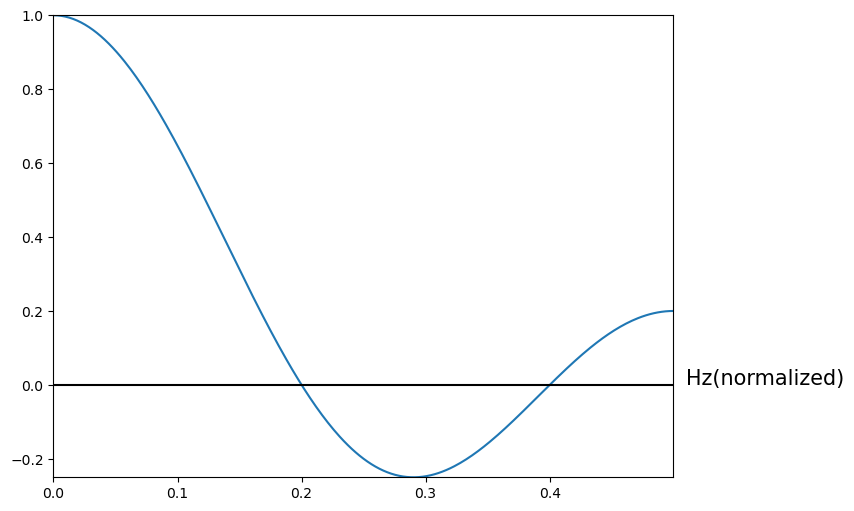

In [23]:
plt.plot(freq, freqseries)
plt.margins(x=0, y=0)
plt.axhline(y=0, color='k')
plt.text(0.51,0,'Hz(normalized)',fontsize=15)

plt.show()

The gain plot above tells us that when digitizing at 300 Hz frequencies between 60 and 120 Hz (0.2 to
0.4) will be attenuated and will be 180 degrees out of phase compared to the frequencies in the original
timeseries. If we are concerned with preserving the phase of frequencies from the unfiltered timeseries,
this is a problem.

## <font color=red>DSP.03.T2) Computing the gain function - more details</font>

### <font color=red>DSP.03.T2.a) Cutoff or Corner Frequency</font>

In common use, the term gain indicates an increase in magnitude, but more generally it refers to any
ratio of output to input. Gain may be greater than, equal to, or less than 1.0.

Equipment called an amplifier generally has the capacity to create an output signal with characteristics matching the input signal except for having a higher magnitude. For example, if it's a sound amplifier, it's not supposed to change the balance of frequencies - it should make all of them louder to the same degree. An attenuator should make all frequencies quieter to the same degree.

If the circuitry - or the digital (mathematical) equivalent - increases or decreases the intensity of some frequencies more than others, we don't normally call it an amplifier. We call it a filter. Usually, we confine "filter" to mean something that selectively attenuates certain frequencies or ranges of frequencies. Often in audio equipment, there's a circuit that boosts all frequencies (within the range of the circuit) and one or more other circuits that selectively attenuates certain frequencies or ranges.

Desirable filters normally have a frequency-dependent gain ranging from 0.0 to 1.0. The relationship
between frequency and gain for a particular filter is typically plotted as the gain function, with frequency
on the x axis and signal magnitude on the y axis represented in amplitude (voltage) or power
(roughly the square of voltage).

The gain function of a filter can be viewed divided into the pass band, the transition band, and the stop band.

A specific frequency within the transition band may be cited as the "cutoff" or "corner" frequency, fc, of the filter.

The definition of fc varies across authors. In the electrical engineering literature, fc is defined fairly
consistently as the half-power frequency--that frequency within the transition band where the gain
(ratio of output power to input power) is 0.5.

However, some sources treat fc as the half-amplitude frequency, which is not the half-power frequency. It's the frequency within the transition band where the gain
(ratio of output amplitude to input amptidue) is 0.5.

### <font color=red>DSP.03.T2.b) Decibels (dB) and fc</font>

Look at the 5-point moving-average gain function plot again. 

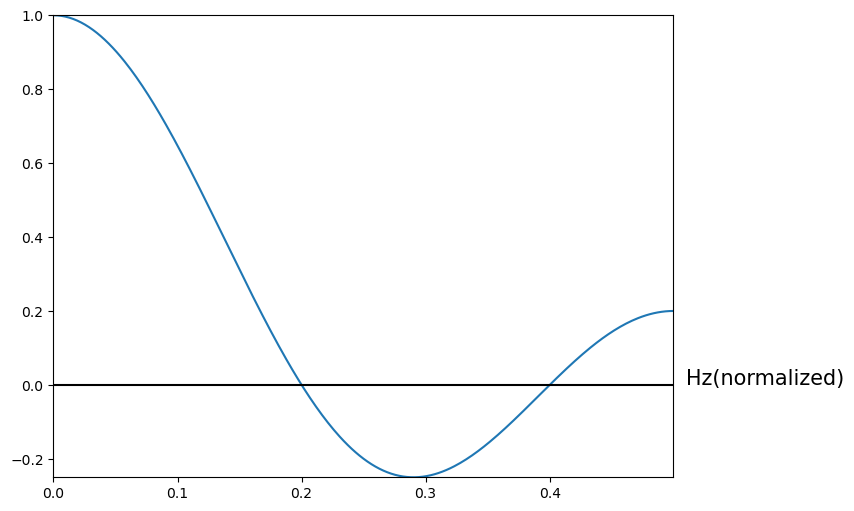

In [24]:
plt.plot(freq, freqseries)
plt.margins(x=0, y=0)
plt.axhline(y=0, color='k')
plt.text(0.51,0,'Hz(normalized)',fontsize=15)

plt.show()

The x axis represents frequency, and the y axis represents gain (gain = transfer function values).
Gain is frequently plotted on a log scale where the y axis is defined as 20 log ratio. When the gain is a
ratio of amplitudes, 10 log ratio where the gain is a ratio of power values. 

Here is a gain plot defining the y axis in log units. (Note: sometimes the x axis is also plotted on a log scale, which can have its advantages. We're not doing that yet. For now, we'll use a log scale just for the y axis.)

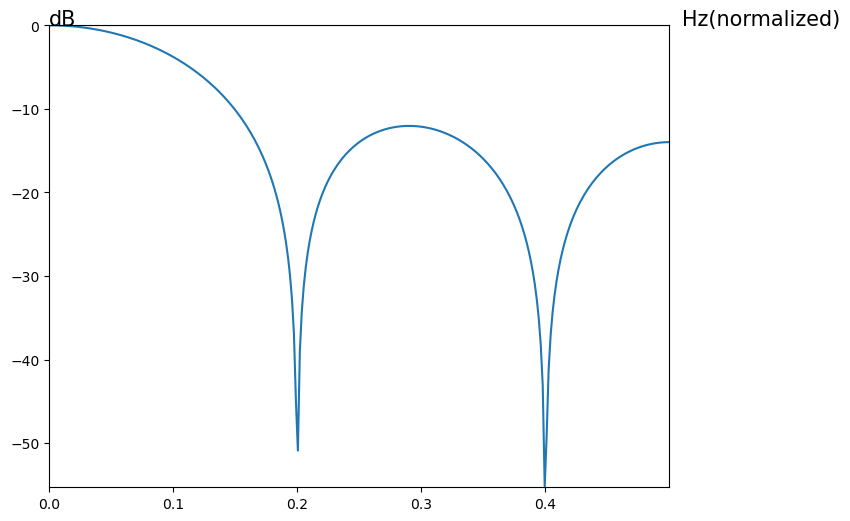

In [25]:
omega = np.arange(0,np.pi,0.01)
freq = omega / (2*np.pi)

freqseries = np.abs(1/5 * (1 + 2 * np.cos(omega) + 2 * np.cos(2*omega)))
freqseries = 20 * np.log10(freqseries)

plt.plot(freq, freqseries)
plt.margins(x=0, y=0)
plt.axhline(y=0, color='k')
plt.text(0.51,0,'Hz(normalized)',fontsize=15)
plt.text(0,0,'dB',fontsize=15)

plt.show()

The y axis is measured in terms of decibels (dBs). The decibel (dB) is an expression of the relationship
between an output quantity and an input quantity (i.e., filtered/unfiltered ). When the reference is 1 (as in this
example) this is simply filtered (1 (1× 1/1 )) . Characterization of the cutoff frequency of a filter in terms of
decibels (dB) involves a log function of the gain, with negative values meaning a gain less than 1.0.

You might notice that the highest value on the y axis is now 0, no longer 1. That's because the log of 1 is 0.

The above plot shows that more high-frequency than low-frequency activity is removed (more negative
dB values indicate that more activity is removed).

Notice the two sharp downward spikes at 0.2 and 0.4. What does that indicate?

Answer:
    
Recall that, with the 5-point moving-average filter, all activity is removed at frequencies of 0.2 and
0.4. The log of 0 is undefined, and so the function goes a little crazy, thus the sharp spikes at these
values.

Because a decibel is a ratio, a decibel is considered to be a dimensionless quantity, a quantity without any physical units and thus a pure
number. The bel is too large for common use, so the decibel (dB), equal to 0.1 bel (B), is more commonly used.

### <font color=red>DSP.03.T2.c) Gain - power and amplitude plots.</font>

In the plots above the y axis is measured in terms of decibels.

There are actually two ways the log plots are presented.

In this plot, gain is expressed in terms of amplitude.

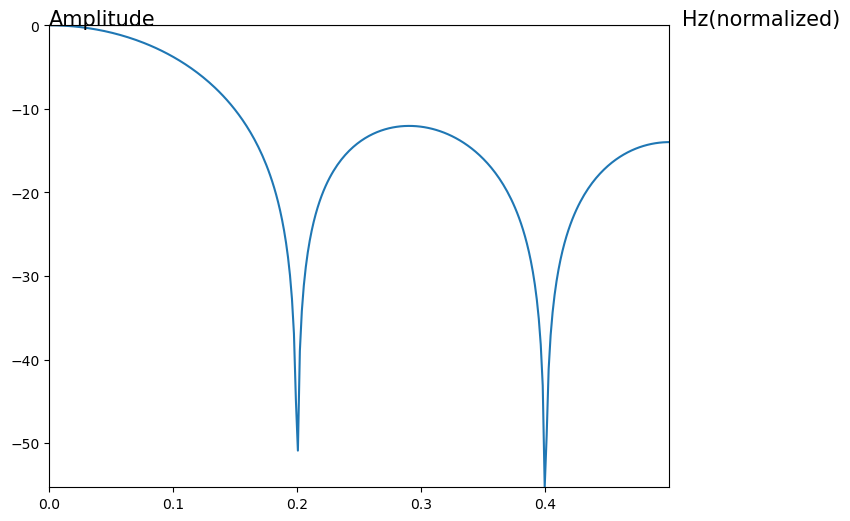

In [26]:
omega = np.arange(0,np.pi,0.01)
freq = omega / (2*np.pi)

freqseries = np.abs(1/5 * (1 + 2 * np.cos(omega) + 2 * np.cos(2*omega)))
freqseries = 20 * np.log10(freqseries)

plt.plot(freq, freqseries)
plt.margins(x=0, y=0)
plt.axhline(y=0, color='k')
plt.text(0.51,0,'Hz(normalized)',fontsize=15)
plt.text(0,0,'Amplitude',fontsize=15)

plt.show()

In this plot, gain is expressed in terms of power.

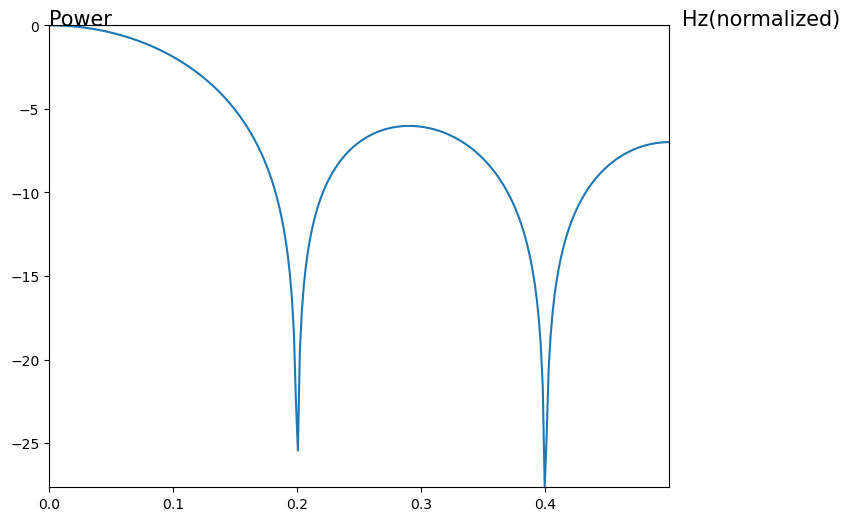

In [27]:
omega = np.arange(0,np.pi,0.01)
freq = omega / (2*np.pi)

freqseries = np.abs(1/5 * (1 + 2 * np.cos(omega) + 2 * np.cos(2*omega)))
freqseries = 10 * np.log10(freqseries)

plt.plot(freq, freqseries)
plt.margins(x=0, y=0)
plt.axhline(y=0, color='k')
plt.text(0.51,0,'Hz(normalized)',fontsize=15)
plt.text(0,0,'Power',fontsize=15)

plt.show()

Characterization of the cutoff frequency of a filter in terms of decibels (dB) involves a log function of the
gain, with different but parallel equations for power and amplitude and with negative values meaning a
gain less than 1.0.

The half-power frequency fc is often referred to as the frequency at which the gain is "3 dB down". Here
is the calculation (with P = power): in dB, a gain of (Pout/Pin) = 0.5 power is 10 log10 (Pout/Pin) = 10 log10
(0.5) = -3 dB.

At the half-amplitude frequency, output is "6 dB down". Here is the calculation (with V = voltage, a common measure of amplitude): a gain of (Vout / Vin) =
0.5 amplitude is 20 log10 (Vout / Vin) = 20 log10 (.5) = -6 dB.

Remember that the half-power frequency and the half-amplitude frequency are not the
same frequency, because power and amplitude are different values. That is, the frequency at which the
filter will reduce the power by half is not the frequency at which it will reduce the amplitude by half.
This is sometimes a source of confusion. Generally, the half-amplitude frequency will be further from
the center of the passband than is the half-power frequency. A characterization of a filter in terms of
the frequency at which output is cut in half is ambiguous unless it is made clear whether this is half of
the power or half of the amplitude.

This isn't about a difference in the filter - only in how it's described, when we state its cutoff frequency, fc, or when we plot its gain function.

A quick aside: we've just been using electrical power and electrical voltage to talk about gain. We were drawing from Ohm's Law:

Voltage = current * resistance (Ohms Law)

Power (in watts) = voltage * current

Therefore, power = voltage * voltage / resistance.

Thus, power is proportional to the square of voltage. Commonly in treatments of these relationships, resistance is implicitly set to 1.0, and
power is said to be the square of voltage.

## <font color=red>DSP.03.T3) Global Warming - Convolving/Filtering</font>

### <font color=red>DSP.03.T3.a) Global temperatures from 1880 to 2005</font>

Data for this example were obtained from the NASA Goddard Institute for Space Studies (New York).
http://data.giss.nasa.gov/gistemp/2005/
    
Is the global temperature increasing? Take a look at a dataset from the NASA Goddard Institute for
Space Studies of the global mean land-ocean temperature index from1880 to 2005 (temperatures in
this study were based on surface air measurements at meteorological stations, and ship and satellite
measurements for sea surface temperature).

Let's load in a data set.

In [28]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

#find and select file "Globalwarming.txt"
file_path = filedialog.askopenfilename()
Globalwarming = pd.read_csv(file_path,delimiter = "\t")
Globalwarming = Globalwarming.to_numpy().flatten()
Globalwarming

array([-0.25, -0.2 , -0.23, -0.24, -0.3 , -0.3 , -0.25, -0.35, -0.26,
       -0.15, -0.37, -0.28, -0.32, -0.32, -0.33, -0.27, -0.17, -0.12,
       -0.25, -0.17, -0.1 , -0.16, -0.27, -0.31, -0.34, -0.25, -0.2 ,
       -0.39, -0.34, -0.36, -0.34, -0.34, -0.34, -0.32, -0.16, -0.09,
       -0.31, -0.4 , -0.33, -0.2 , -0.19, -0.14, -0.24, -0.21, -0.22,
       -0.16, -0.02, -0.14, -0.12, -0.25, -0.07, -0.02, -0.06, -0.18,
       -0.05, -0.11, -0.04,  0.08,  0.11,  0.02,  0.05,  0.1 ,  0.03,
        0.1 ,  0.2 ,  0.07, -0.04,  0.01, -0.04, -0.06, -0.15, -0.04,
        0.03,  0.11, -0.1 , -0.1 , -0.17,  0.08,  0.08,  0.06, -0.01,
        0.08,  0.04,  0.08, -0.2 , -0.11, -0.03,  0.  , -0.04,  0.08,
        0.03, -0.1 ,  0.  ,  0.14, -0.08, -0.05, -0.16,  0.13,  0.01,
        0.09,  0.18,  0.27,  0.05,  0.26,  0.09,  0.06,  0.13,  0.26,
        0.31,  0.19,  0.38,  0.35,  0.12,  0.14,  0.23,  0.38,  0.3 ,
        0.39,  0.56,  0.32,  0.33,  0.48,  0.56,  0.55,  0.48,  0.62])

This is a list of the years in which temperature measurements were taken followed by the yearly temperature
measurements in degrees centigrade. Do the temperature measures look a little odd? It's because the
temperature data are the global annual surface temperature relative to a 1951-1980 mean.

There are 126 pairs of datapoints in the imported file. 

For analyses, only the temperature data are needed, so the year values can be removed, leaving only the temperature values. 

OK, plot the temperature data.

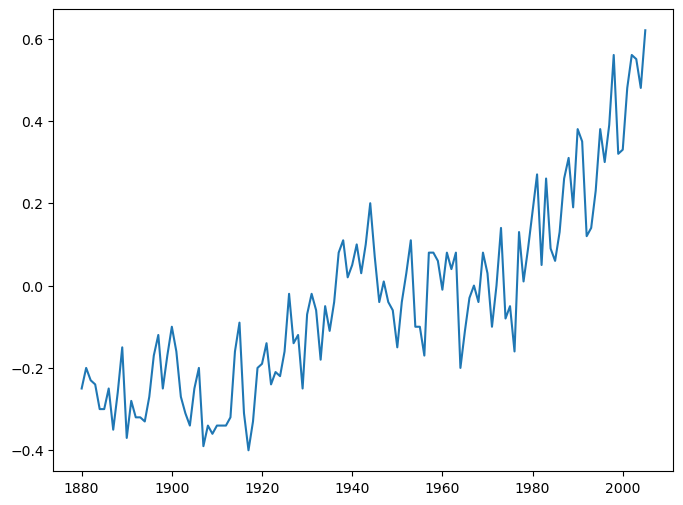

In [29]:
years = np.arange(1880,2006)

# Plotting time vs amplitude using plot function from pyplot
plt.plot(years, Globalwarming)

# Finally displaying the plot
plt.show()   

Temperature readings start in 1880 and end in 2005.

The graph shows the global annual surface temperature relative to a 1951-1980 mean.
Note that the values between 1951 to 1980 are close to zero - this is because this period was used as a reference.

Although the graph shows year-to-year variation, across the last several decades global temperatures
do appear to be increasing.

Some of the year-to-year fluctuations may not be of interest - it is just normal year-to-year fluctuation.
Is there a way to filter the data to remove some of the yearly fluctuation so that general trends can be
more clearly observed?

Answer:
    
Sure. To remove the year-to-year variation, remove some of the high-frequency activity. A moving-average
filter should do the trick.

Start with a moving-average kernel of size 5 (i.e., average across overlapping 5-year periods).

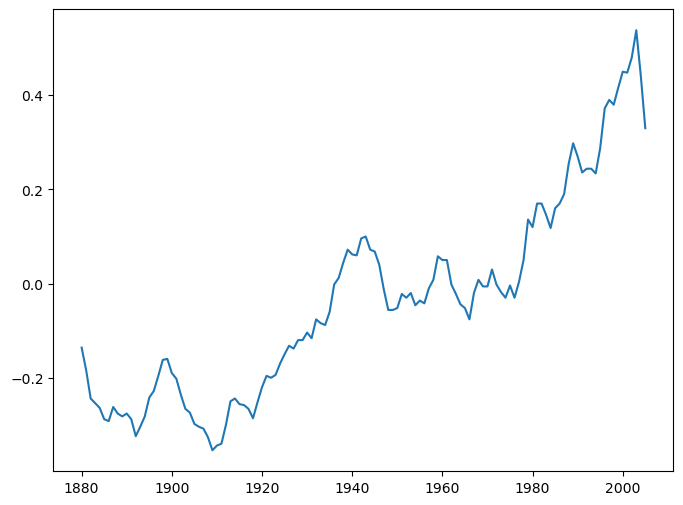

In [30]:
from scipy import signal

kernel = 1/5 * np.ones(5)
Globalwarming_filtered = signal.convolve(Globalwarming,kernel,mode='same')

# Plotting time vs amplitude using plot function from pyplot
plt.plot(years, Globalwarming_filtered)

# Finally displaying the plot
plt.show() 

Looks good.

Create a kernel of 11 values and multiply each datapoint in the unfiltered data by this kernel.

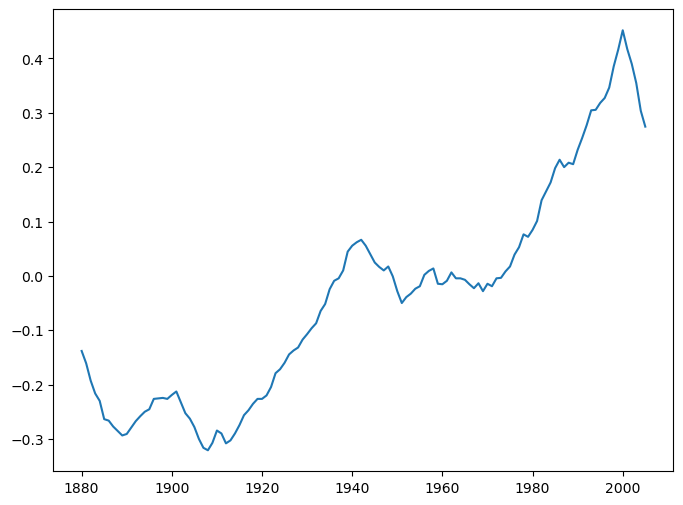

In [31]:
from scipy import signal

kernel = 1/11 * np.ones(11)
Globalwarming_filtered = signal.convolve(Globalwarming,kernel,mode='same')

# Plotting time vs amplitude using plot function from pyplot
plt.plot(years, Globalwarming_filtered)

# Finally displaying the plot
plt.show() 

Pretty nice.

Compare the original timeseries and the above filtered timeseries.

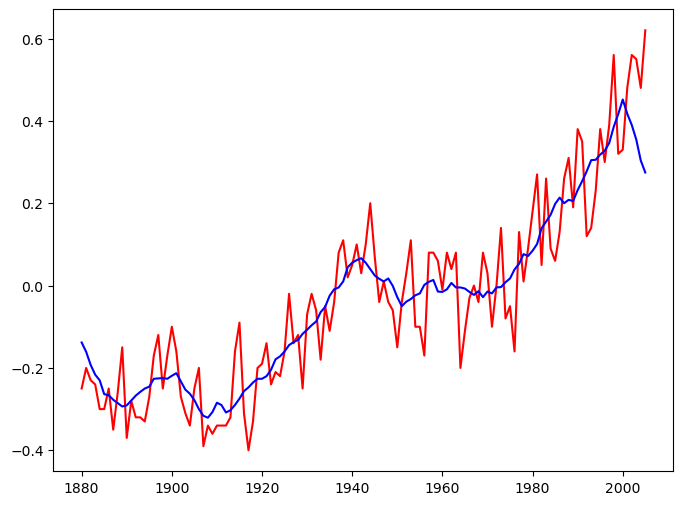

In [32]:
# Plotting time vs amplitude using plot function from pyplot
plt.plot(years, Globalwarming, color = "r")
plt.plot(years, Globalwarming_filtered, color = "b")

# Finally displaying the plot
plt.show() 

The last point in the unfiltered data (red line) shows that global warming increased approximately 0.6°C in
the past three decades and 0.8°C in the past century. Specifically, there seems to be slow global warming,
with large fluctuations, over the century up to 1975 and subsequent rapid warming of almost 0.2°C
per decade.